# ORDENAÇÃO TOPOLÓGICA

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

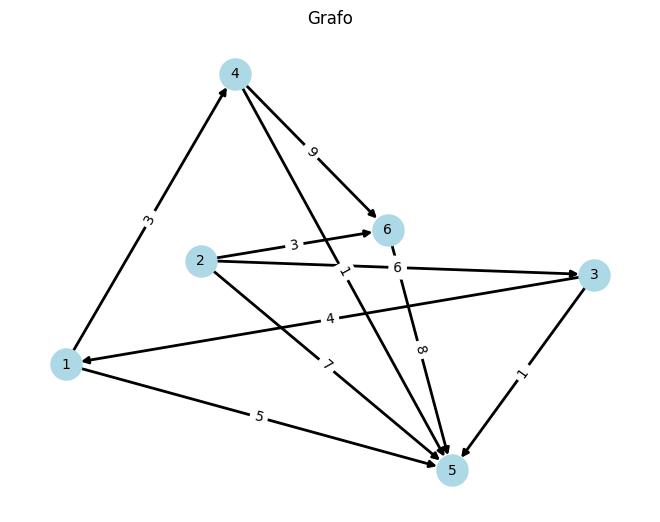

In [6]:
# Grafo orientado com pesos
G = nx.DiGraph()

# Adicionando nós
G.add_nodes_from([1, 2, 3, 4,6])

# Adicionando arestas com pesos
G.add_weighted_edges_from([
    (1, 5, 5), (1, 4, 3), 
    (2, 3, 6), (2, 5, 7), (2,6,3),
    (3,1,4),(3,5,1),
    (4,5,1),(4,6,9),
    (6,5,8)
])

# Desenhando o grafo
pos = nx.spring_layout(G)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo")
plt.show()


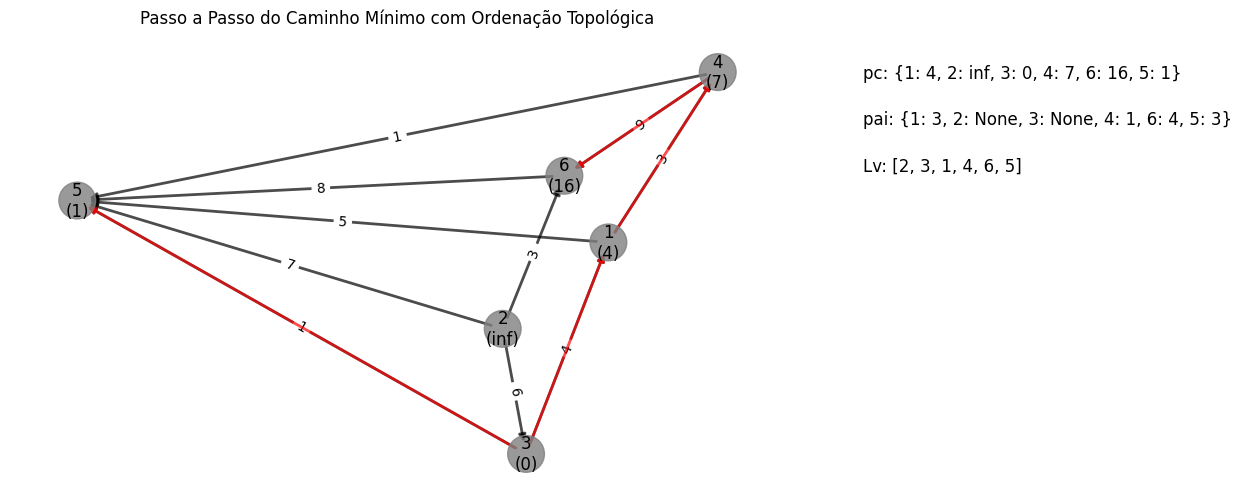

In [16]:
def OrdTopologica(G):
    marca = {v: 'I' for v in G.nodes()}  # Marcas para cada vértice
    Lv = []  # Lista para ordenação topológica
    
    def dfs_visit(vd):
        marca[vd] = 'D'
        for vadj in G.adj[vd]:
            if marca[vadj] == 'I':
                dfs_visit(vadj)
        marca[vd] = 'E'
        Lv.insert(0, vd)  # Inserindo na cabeça da lista
    
    for v in G.nodes():
        if marca[v] == 'I':
            dfs_visit(v)
    
    return Lv

def CM_ordTopologica(G, vo):
    pc = {v: float('inf') for v in G.nodes()}  # Vetor de pesos mínimos
    pai = {v: None for v in G.nodes()}  # Vetor de predecessores
    pc[vo] = 0
    Lv = OrdTopologica(G)
    
    for v in Lv:
        for vadj in G.adj[v]:
            if pc[vadj] > pc[v] + G[v][vadj]['weight']:
                pc[vadj] = pc[v] + G[v][vadj]['weight']
                pai[vadj] = v
    
    return pc, pai, Lv

def plot_CM_ordTopologica(G, vo):
    pc, pai, Lv = CM_ordTopologica(G, vo)
    
    # Criando o plot para o Algoritmo de Caminho Mínimo com Ordenação Topológica
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    
    node_colors = ['lightblue' if node not in pc else 'gray' for node in G.nodes()]
    node_labels = {node: str(node) + f"\n({pc[node]})" for node in G.nodes()}
    
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black', width=2, alpha=0.7)
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors, alpha=0.8)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    if pai:
        path_edges = [(pai[node], node) for node in pai if pai[node] is not None]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, alpha=0.7)
    
    plt.text(1.1, 0.9, f"pc: {pc}", transform=plt.gca().transAxes, fontsize=12)
    plt.text(1.1, 0.8, f"pai: {pai}", transform=plt.gca().transAxes, fontsize=12)
    plt.text(1.1, 0.7, f"Lv: {Lv}", transform=plt.gca().transAxes, fontsize=12)
    
    plt.title("Passo a Passo do Caminho Mínimo com Ordenação Topológica")
    plt.axis('off')
    plt.show()
    


# Executando e plotando o Algoritmo de Caminho Mínimo com Ordenação Topológica
plot_CM_ordTopologica(G, vo=3)
